# Finite Element Advection Diffusion Equation

## Weak formulation

We will start with the 2D pure conduction equation:
$$\rho c \frac{\partial T}{\partial t} = \frac{\partial}{\partial x}\biggl(k \frac{\partial T}{\partial x}\biggr) + \frac{\partial}{\partial y}\biggl(k \frac{\partial T}{\partial y}\biggr)$$
where $k$ is the material conductivity, $\rho$ is the material density, $c$ is the material capacitance.  

Let's multiply each side of the equation on the test function (shape function) $\phi$ and integrate it over the domain volume $\Omega$):
$$
\int_{\Omega}{\rho c \frac{\partial T}{\partial t} \phi_e dx dy} = \int_{\Omega}{\frac{\partial}{\partial x}\biggl(k \frac{\partial{T}}{\partial x} \biggr)\phi_e dx dy} + \int_{\Omega}{\frac{\partial}{\partial y}\biggl(k \frac{\partial{T}}{\partial y}\biggr) \phi_e dx dy} 
$$

We need to use Gauss-Ostrogradsky theorem which is represented as:
$$\int_{\Omega}{\mathbf{\nabla}\cdot \mathbf{F} dV} = \int_{\partial\Omega}{\mathbf{F}\cdot\mathbf{n}} dS$$

Notice also, that the following can be represented as:
$$\mathbf{\nabla}\cdot \phi \mathbf{\nabla} G = \phi \mathbf{\nabla}\cdot\mathbf{\nabla G} + \mathbf{\nabla}\phi\cdot\mathbf{\nabla}G$$


Assuming that $k$, $\rho$ and $c$ are all constants and $G=k T$, the following is obtained:
$$
\int_{\Omega}{\rho c \partial_t T \phi dV} =\int_{\partial \Omega}{k\partial_n T \phi dS} - \int_{\Omega}{\biggl(k \partial_x T \partial_x \phi + k \partial_y T \partial_y \phi\biggr) dV}
$$

We now need to take integrals over the boundary. For the Newmann boundary condition there is a prescribed flux boundary condition: $k\partial_n T|_{\partial \Omega_N} = g_N$. Whenever on boundary we have a prescribed Dirichlet boundary condition, i.e. $T|_{\partial \Omega_D} = g_D$, to avoid calculating the integral over the boundary $\int_{\partial \Omega}{k\partial_n T\phi dS}$ for Dirichlet boundary condition we ask a test function to have a zero value on the boudnary $\phi|_{\partial \Omega_D} = 0$.

Therefore the following integral can be calculated as follows:
$$
\int_{\Omega}{\rho c \partial_t T \phi dV} =\int_{\partial \Omega_N}{g_N \phi dS} - \int_{\Omega}{\biggl(k \partial_x T \partial_x \phi + k \partial_y T \partial_y \phi\biggr) dV}
$$

Now we approximate the test function $\phi$ from the space of the first order polynomials defined in the whole domain. We also approximate the temperature function as the summation through all possible first order polynomials. However, it's almost impossible to work with all possible first order polynomials in space and represent the temperature through their summation ($\sum_{i=0}^{\infty}{a_i x + b_i y + c_i}$). 

Instead, we introduce the discretization of space into certain geometrical features, say the domain $\Omega$ is subdivided onto $M$ features (triangles in our case) and have $N$ nodes. 

In each geometrical feature $ e = 1..M$ the solution is represented through one of polynomials. Assuming that we have a basis for polynomials in this geometrical feature, one can write:  
$$
T_e = \sum_{j=1}^{d}{a_j \phi^e_j(x,y)},
$$
where $a_j$ are the weights, $d$ is the number of coefficients, $\phi_j^e$ is the linear shape function corresponding to the node $j$ of the element $e$. 

A few things to note in triangle we have only three points that will be searched for in the final solution, so we will have only three basis functions inside the triangle.  At this particular point nothing stops us to assume that the shape function takes $1$ at node itself and $0$ at any other nodes. So the profile of temperatures inside the geometrical feature $e$ can be represented through its nodal values:
$$
T_e = \sum_{j=1}^{d}{T_j^e \phi^e_j(x,y)},
$$
where $\phi^e_j(x_j,y_j) = 1$ and $\phi^e_j(x_k,y_k)=0$ for $j\neq k$ ($x_j,y_j$ are coordinates of the node $j$). Also, outside the element $e$ this shape function equals zero. Notice, that each shape function is represented as $\phi^e_j(x,y) = a_j x + b_j y +c_j$.

Now the big integral (assuming that the basis function has non-zero value only inside the corresponding triangle), then the whole integral is taken as summation over the geometrical features. If we take the test function to be a shape function, then the integral with this shape function $\phi^e_j$ will be taken only inside the corresponding geometrical feature:
$$
\int_{\Omega^e}{\rho c \partial_t \sum_k{T_k^e \phi^e_k} \phi^e_j dV}=\int_{\partial\Omega_N^e}{g^e_N \phi_j^e dS} - \int_{\Omega^e}{\biggl(k\partial_x \phi_j^e \sum_k{T_k^e \partial_x \phi_k^e + k\partial_y \phi_j^e \sum_k{T_k^e \partial_y \phi_k^e}}\biggr)}
$$

We discretize in time using the implicit discretization:
$$
\partial_t T_k^e = \frac{{T_k^e}_{n+1}-{T_k^e}_n}{t_{n+1}-t_n}
$$


Eventually we will have the linear system involving the nodal temperatures. Let us see derive this matrix:
$$
\int_{\Omega^e}{\frac{\rho c}{t_{n+1}-t_n}  \sum_k{\bigl({T_k^e}_{n+1}-{T_k^e}_n\bigr) \phi^e_k} \phi^e_j dV}=\int_{\partial\Omega_N^e}{{g^e_N}_{n+1} \phi_j^e dS} - \int_{\Omega^e}{\biggl(k\partial_x \phi_j^e \sum_k{{T_k^e}_{n+1} \partial_x \phi_k^e + k\partial_y \phi_j^e \sum_k{{T_k^e}_{n+1} \partial_y \phi_k^e}}\biggr)}
$$

For each element we have the following coefficients:
$$
\frac{\rho c}{t_{n+1}-t_n}\sum_k{{T_k^e}_{n+1} M_{kj}}-\frac{\rho c}{t_{n+1}-t_n}\sum_k{{T_k^e}_n M_{kj}} = 
\int_{\partial_{\Omega^e_N}}{{g^e_N}_{n+1}\phi^e_j dS} - k\sum_k{{T_k^e}_{n+1} A_{kj}},
$$
where the mass matrix is $M_{kj} = \int_{\Omega^e}{\phi_k^e\phi_j^e dV}$ and the stiffness matrix $A_{kj} = \int_{\Omega^e}{\bigl(\partial_x \phi_k^e \partial_x\phi_j^e +\partial_y \phi_k^e \partial_y\phi_j^e \bigr)}$.

Overall we can obtain the matrix equation:
$$
\frac{\rho c}{t_{n+1}-t_n} \mathbf{M} \mathbf{T}_{n+1} + k \mathbf{A} T_{n+1} = \mathbf{G}_{n+1}+\frac{\rho c}{t_{n+1}-t_n} \mathbf{M}\mathbf{T}_n 
$$

This equation is valid only for one element but eventually we will have many elements contributing to the same node. It means that the contributions need to be summed up.

# Shape functions

So far we didn't talk much about the shape functions. Those need to equal $1$ on the corresponding node and $0$ on another one. Given arbitrary coordinates of the triangle, we kind of need to come up with the new shape functions formulation for each new triangle. Instead, we will offer the basic form of the shape functions.

Each triangle with coordinates of vertices $(x_0,y_0)$, $(x_1,y_1)$ and $(x_2,y_2)$ is transformed to the basis triangle with coordinates  $(0,0)$, $(1,0)$ and $(1,1)$. We call this transformation from $\Omega_e$ to $\Omega_{\bar{e}}$.

<img src="mapping.png"/>

Let's derive the transformation matrix:
$$
\begin{pmatrix}
0\\
0
\end{pmatrix} = 
A 
\begin{pmatrix}
x_0\\
y_0\\
\end{pmatrix} + B
$$
$$
\begin{pmatrix}
1\\
0
\end{pmatrix} = 
A 
\begin{pmatrix}
x_1\\
y_1\\
\end{pmatrix} + B
$$
$$
\begin{pmatrix}
0\\
1
\end{pmatrix} = 
A 
\begin{pmatrix}
x_2\\
y_2\\
\end{pmatrix} + B
$$



In [1]:
import pylab
%pylab inline
import sympy

Populating the interactive namespace from numpy and matplotlib


/home/shurik/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
x0,y0,x1,y1,x2,y2 = sympy.symbols('x0,y0,x1,y1,x2,y2')

Matrix $A$ and vector $B$ represent the transformation:
$$
A = 
\begin{pmatrix}
a&b\\
c&d\\
\end{pmatrix}
$$
$$
B=
\begin{pmatrix}
e\\
f
\end{pmatrix}
$$

In terms of unknown things, i.e. $a$,$b$,$c$,$d$,$e$,$f$, we can write the following:
$$
\begin{pmatrix}
0\\
0\\
1\\
0\\
0\\
1
\end{pmatrix} = 
\begin{pmatrix}
x_0&y_0&1&0&0&0\\
0&0&0&x_0&y_0&1\\
x_1&y_1&1&0&0&0\\
0&0&0&x_1&y_1&1\\
x_2&y_2&1&0&0&0\\
0&0&0&x_2&y_2&1\\
\end{pmatrix}
\begin{pmatrix}
a\\
b\\
e\\
c\\
d\\
f
\end{pmatrix}
$$

In [3]:
a,b,c,d,e,f = sympy.symbols('a,b,c,d,e,f')
system = sympy.Matrix(((x0,y0,1,0,0,0,0),(0,0,0,x0,y0,1,0),(x1,y1,1,0,0,0,1),(0,0,0,x1,y1,1,0),(x2,y2,1,0,0,0,0),(0,0,0,x2,y2,1,1)))

In [4]:
solution=sympy.solve_linear_system(system,a,b,e,c,d,f)
solution

{a: (-y0 + y2)/(x0*y1 - x0*y2 - x1*y0 + x1*y2 + x2*y0 - x2*y1),
 b: (x0 - x2)/(x0*y1 - x0*y2 - x1*y0 + x1*y2 + x2*y0 - x2*y1),
 c: (y0 - y1)/(x0*y1 - x0*y2 - x1*y0 + x1*y2 + x2*y0 - x2*y1),
 d: (-x0 + x1)/(x0*y1 - x0*y2 - x1*y0 + x1*y2 + x2*y0 - x2*y1),
 e: (-x0*y2 + x2*y0)/(x0*y1 - x0*y2 - x1*y0 + x1*y2 + x2*y0 - x2*y1),
 f: (x0*y1 - x1*y0)/(x0*y1 - x0*y2 - x1*y0 + x1*y2 + x2*y0 - x2*y1)}

Let's check if we obtained equations right:

In [5]:
print("The first point = ",sympy.simplify(solution[a]*x0+solution[b]*y0+solution[e]),sympy.simplify(solution[c]*x0+solution[d]*y0+solution[f]))
print("The second point = ",sympy.simplify(solution[a]*x1+solution[b]*y1+solution[e]),sympy.simplify(solution[c]*x1+solution[d]*y1+solution[f]))
print("The third point = ",sympy.simplify(solution[a]*x2+solution[b]*y2+solution[e]),sympy.simplify(solution[c]*x2+solution[d]*y2+solution[f]))

The first point =  0 0
The second point =  1 0
The third point =  0 1


Therefore the transformation is as follows:
$$
\begin{aligned}
&s =\frac{-y_0 + y_2}{2 A} x + \frac{x_0 - x_2}{2 A} y + \frac{-x_0 y_2 + x_2 y_0}{2 A}\\
&t = \frac{y_0 - y_1}{2 A} x + \frac{-x_0 + x_1}{2 A} y + \frac{x_0 y_1 - x_1 y_0}{2 A}
\end{aligned}
$$
where $2 A = x_0 y_1 - x_0 y_2 - x_1 y_0 + x_1 y_2 + x_2 y_0 - x_2 y_1$ is double area of the original triangle. 

Now let's represent the new variables' derivatives through the old ones:
$$
\begin{aligned}
ds =\frac{-y_0 + y_2}{2 A} dx + \frac{x_0 - x_2}{2 A} dy \\
dt = \frac{y_0 - y_1}{2 A} dx + \frac{-x_0 + x_1}{2 A} dy
\end{aligned}
$$
Basically the fractions become:
$$
\begin{pmatrix}
ds\\
dt
\end{pmatrix}=
J
\begin{pmatrix}
dx\\
dy
\end{pmatrix}
$$
where the Jacobian is represented as:
$$
J=
\frac{1}{2A}\begin{pmatrix}
-y_0 + y_2 & x_0 - x_2 \\
y_0 - y_1 & -x_0 + x_1 
\end{pmatrix}
$$

In [6]:
area, jacobian = sympy.symbols('area,jacobian')
area = (x0*y1 - x0*y2 - x1*y0 + x1*y2 + x2*y0 - x2*y1)/2
jacobian = 1/(2*area) * sympy.Matrix(((y2-y0,x0-x2),(y0-y1,-x0+x1)))

In [7]:
inv_jacobian=sympy.simplify(jacobian.inv())
inv_jacobian

Matrix([
[-x0 + x1, -x0 + x2],
[-y0 + y1, -y0 + y2]])

In [8]:
sympy.simplify(inv_jacobian.det())

(x0 - x1)*(y0 - y2) - (x0 - x2)*(y0 - y1)

Or in other words:
$$
\begin{pmatrix}
dx\\
dy
\end{pmatrix} = J^{-1}
\begin{pmatrix}
ds\\
dt
\end{pmatrix}
$$

Now we need to estimate certain integrals that are involved in mass and stiffness matrix:
$$
\int_{\Omega_e}{\phi_k^e(x,y)\phi_j^e(x,y) dx dy} = \int_{\Omega_\bar{e}}{\phi_k^\bar{e}(s,t)\phi_j^\bar{e}(s,t) |J^{-1}| ds dt}
$$

As far as we are working in the linear  space the Jacobian is a constant depending only on the coordinates of nodes in the original space, so we can take it out of the integral:
$$
\int_{\Omega_\bar{e}}{\phi_k^\bar{e}(s,t)\phi_j^\bar{e}(s,t) |J^{-1}| ds dt} = |J^{-1}| \int_{\Omega_\bar{e}}{\phi_k^\bar{e}(s,t)\phi_j^\bar{e}(s,t)  ds dt} 
$$

It's easy to show that the shape functions in the linear space are the following:
$$
\begin{aligned}
&\phi_0(s,t) = 1-s-t\\
&\phi_1(s,t) = s\\
&\phi_2(s,t) = t
\end{aligned}
$$

The integrals then can be calculated as follows:
$$
\int_{\Omega^{\bar{e}}}{
\begin{pmatrix}
\phi_0 & \phi_1 & \phi_2
\end{pmatrix}
\begin{pmatrix}
\phi_0\\
\phi_1\\
\phi_2
\end{pmatrix} 
ds dt
}=
\frac{A}{12}
\begin{pmatrix}
2 & 1 & 1\\
1 & 2 & 1\\
1 & 1 & 2
\end{pmatrix}
$$

Now let's derive the stiffness matrix. First of all according to the chain rule the following can be obtained:
$$
\begin{aligned}
&\partial_x \phi_i(x,y) = \partial_s \phi_i(s,t) \partial_x s + \partial_t \phi_i(s,t) \partial_x t\\
&\partial_y \phi_i(x,y) = \partial_s \phi_i(s,t) \partial_y s + \partial_t \phi_i(s,t) \partial_y t\\
\end{aligned}
$$

Substituting expressions for $s$ and $t$ the equations become:
$$
\begin{aligned}
&\partial_x \phi_i(x,y) = \partial_s \phi_i(s,t) \frac{-y_0 + y_2}{2 A} + \partial_t \phi_i(s,t) \frac{y_0-y_1}{2 A}\\
&\partial_y \phi_i(x,y) = \partial_s \phi_i(s,t) \frac{x_0-x_2}{2 A} + \partial_t \phi_i(s,t) \frac{-x_0 + x_1}{2 A}
\end{aligned}
$$

Therefore, the derivatives for the shape functions are the following:
$$
\begin{aligned}
&\partial_x \phi_0(x,y) = -\frac{-y_0+y_2}{2 A} - \frac{y_0 - y_1}{2 A} = \frac{y_1 - y_2}{2 A} && \partial_y \phi_0(x,y) =-\frac{x_0 - x_2}{2 A} - \frac{-x_0 + x_1}{2 A} = \frac{x_2 - x_1}{2 A} \\
&\partial_x \phi_1(x,y) = \frac{-y_0 +y_2}{2 A} && \partial_y \phi_1(x,y) = \frac{x_0 - x_2}{2 A}\\
&\partial_x \phi_2(x,y) = \frac{y_0-y_1}{2 A}&& \partial_y \phi_2(x,y) = \frac{-x_0+x_1}{2 A} \\
\end{aligned}
$$

Therefore the stiffness matrix will be the following:
$$
\mathbf{A} =\int_{\Omega_e}{ 
\begin{pmatrix}
\partial_x \phi_0 \partial_x \phi_0 + \partial_y \phi_0 \partial_y \phi_0 & \partial_x \phi_0 \partial_x \phi_1 + \partial_y \phi_0 \partial_y \phi_1 & \partial_x \phi_0 \partial_x \phi_2 + \partial_y \phi_0 \partial_y \phi_2\\
\partial_x \phi_1 \partial_x \phi_0 + \partial_y \phi_1 \partial_y \phi_0 & \partial_x \phi_1 \partial_x \phi_1 + \partial_y \phi_1 \partial_y \phi_1 & \partial_x \phi_1 \partial_x \phi_2 + \partial_y \phi_1 \partial_y \phi_2\\
\partial_x \phi_2 \partial_x \phi_0 + \partial_y \phi_2 \partial_y \phi_0 & \partial_x \phi_2 \partial_x \phi_1 + \partial_y \phi_2 \partial_y \phi_1 & \partial_x \phi_2 \partial_x \phi_2 + \partial_y \phi_2 \partial_y \phi_2\\
\end{pmatrix}
dV}
$$

The matrix $\mathbf{A}$ is therefore the following:
$$
\mathbf{A} = 
\begin{pmatrix}
\frac{1}{4 A}\Bigl((y_2-y_1)^2 + (x_2 - x_1)^2\Bigr)& \frac{1}{4 A} \Bigl((y_1-y_2)(-y_0+y_2) + (x_2-x_1)(x_0-x_2)\Bigr)& 
\frac{1}{4 A}\Bigl((y_1-y_2)(y_0-y_1)+(x_2-x_1)(-x_0+x_1) \Bigr)\\
\frac{1}{4 A} \Bigl((y_1-y_2)(-y_0+y_2) + (x_2-x_1)(x_0-x_2)\Bigr)& \frac{1}{4 A}\Bigl((y_2-y_0)^2 + (x_2-x_0)^2\Bigr)& \frac{1}{4 A} \Bigl((-y_0+y_2)(y_0-y_1)+(x_0-x_2)(-x_0+x_1) \Bigr)\\
\frac{1}{4 A}\Bigl((y_1-y_2)(y_0-y_1)+(x_2-x_1)(-x_0+x_1) \Bigr)& \frac{1}{4 A} \Bigl((-y_0+y_2)(y_0-y_1)+(x_0-x_2)(-x_0+x_1) \Bigr) & \frac{1}{4 A}\Bigl((y_1-y_0)^2+(x_1-x_0)^2\Bigr) 
\end{pmatrix}
$$

# Spatial discretization

Let us generate the triangulation for the square box with the height $H$ and length $L$. We will first generate certain number of points and then perform Delaunay triangulation. 

In [9]:
L = 1.0
H = 2.0
NX = 10
NY = 20
NPOINTS = 200
NDIRICHLET = 10
NNEUMANN = 10

In [10]:
import random
import numpy
points = numpy.zeros((NPOINTS,2))
points[0,0] = 0.0
points[0,1] = 0.0
points[NDIRICHLET,0] = L
points[NDIRICHLET,1] = 0.0
for i in range(1,NDIRICHLET-1):
    points[i,0] = 0.0
    points[i,1] = random.random() * H
    points[i+NDIRICHLET,0] = L
    points[i+NDIRICHLET,1] = random.random() * H
points[NDIRICHLET-1,0] = 0.0
points[NDIRICHLET-1,1] = H
points[2*NDIRICHLET-1,0] = L
points[2*NDIRICHLET-1,1] = H

for i in range(NNEUMANN):
    points[2*NDIRICHLET+i,0] = random.random() * L
    points[2*NDIRICHLET+i,1] = 0
    points[2*NDIRICHLET+NNEUMANN+i,0] = random.random() * L
    points[2*NDIRICHLET+NNEUMANN+i,1] = H
    
for i in range(2*NDIRICHLET+2*NNEUMANN,NPOINTS):
    points[i,0] = random.random() * L
    points[i,1] = random.random() * H
print(points)

[[0.         0.        ]
 [0.         0.6050055 ]
 [0.         1.86964222]
 [0.         0.02890126]
 [0.         0.09018849]
 [0.         1.86165089]
 [0.         0.77892892]
 [0.         1.49010386]
 [0.         1.01187612]
 [0.         2.        ]
 [1.         0.        ]
 [1.         1.48951947]
 [1.         1.66519653]
 [1.         1.98039168]
 [1.         0.35321453]
 [1.         0.15494515]
 [1.         0.15270251]
 [1.         0.73569848]
 [1.         1.50380005]
 [1.         2.        ]
 [0.27269329 0.        ]
 [0.08659572 0.        ]
 [0.04108809 0.        ]
 [0.85571883 0.        ]
 [0.85700616 0.        ]
 [0.5214037  0.        ]
 [0.97602975 0.        ]
 [0.23610486 0.        ]
 [0.08968265 0.        ]
 [0.78734389 0.        ]
 [0.14797656 2.        ]
 [0.75601531 2.        ]
 [0.76314058 2.        ]
 [0.33516768 2.        ]
 [0.94699967 2.        ]
 [0.996568   2.        ]
 [0.9300038  2.        ]
 [0.02743127 2.        ]
 [0.41308762 2.        ]
 [0.85452098 2.        ]


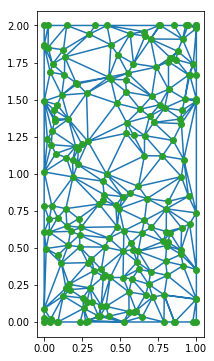

In [11]:
from scipy.spatial import Delaunay

tri = Delaunay(points)

pylab.figure(figsize=(3,6))
pylab.triplot(points[:,0], points[:,1], tri.simplices)
pylab.plot(points[:,0], points[:,1], 'o')

The problem we would like to solve is the following:
$$
\rho C \partial_t T = k \Delta T\text{ with } T(0, y) = 1, T(L,y) = 0, \partial_y T(x,y=0,H) = 0
$$

Assuming that $\rho = C = k = 1$, the solution for the one-dimensional equation is the following:
$$
\phi(x,t) = \frac{L-x}{L}-\sum_{k=1}^{\infty}{\frac{2}{k \pi}\sin\bigl(\frac{k \pi}{L} x\bigr)\exp\bigl(-\frac{\pi^2 k^2}{L^2} t\bigr)}
$$

In [17]:
def updateMatrix(mass, stiffness, phi):
    # Define first the Dirichlet boundary conditions
    for i in range(NDIRICHLET):
        mass[i,i] = 1
        mass[i+NDIRICHLET,i+NDIRICHLET] = 1
        phi[i]=1
        phi[i+NDIRICHLET]=0

    # Let's go through all the triangles
    for triangle in tri.simplices:
        vertex0 = triangle[0]
        vertex1 = triangle[1]
        vertex2 = triangle[2]
        area = 0.5 * ( points[vertex0,0]*(points[vertex1,1]-points[vertex2,1]) 
                      -points[vertex1,0]*(points[vertex0,1]-points[vertex2,1])
                      +points[vertex2,0]*(points[vertex0,1]-points[vertex1,1]))
        for vertex0 in triangle:
            if vertex0 < 2*NDIRICHLET:
                continue
            triangle2 = triangle.tolist()
            triangle2.remove(vertex0)
            vertex1 = triangle2[0]
            vertex2 = triangle2[1]
            mass[vertex0,vertex0] += area/12.0 * 2.0
            mass[vertex0,vertex1] += area/12.0
            mass[vertex0,vertex2] += area/12.0
            if vertex0==0:
                print("Triangle = ", triangle)
            stiffness[vertex0,vertex0] += 0.25/area * ( (points[vertex2,0]-points[vertex1,0])**2 
                                                       +(points[vertex2,1]-points[vertex1,1])**2)
            stiffness[vertex0,vertex1] += 0.25/area * ( (points[vertex2,0]-points[vertex1,0])*(points[vertex0,0]-points[vertex2,0]) 
                                                       +(points[vertex2,1]-points[vertex1,1])*(points[vertex0,1]-points[vertex2,1]))
            stiffness[vertex0,vertex2] += 0.25/area * ( (points[vertex2,0]-points[vertex1,0])*(-points[vertex0,0]+points[vertex1,0]) 
                                                       +(points[vertex2,1]-points[vertex1,1])*(-points[vertex0,1]+points[vertex1,1]))
            
    print(numpy.linalg.det(mass))

In [13]:
def analytical(time):
    numTerms = 400
    numX = 101

    x=numpy.linspace(0,L,numX)
    sol = (L - x)/L
    alpha = 1.0
    for term in range(1,numTerms+1):
        sol = sol - 2.0/(term*numpy.pi)*numpy.sin(term * numpy.pi*x/L)*numpy.exp(-alpha*(numpy.pi**2)*(term**2)/(L**2)*time)
    return x,sol

0.0


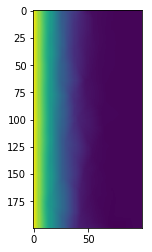

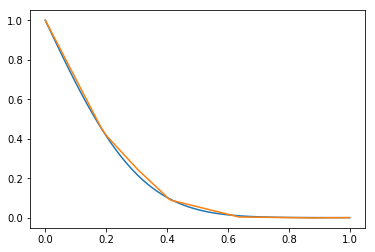

In [24]:
from IPython import display
from matplotlib.tri import Triangulation, LinearTriInterpolator

deltat = 0.001
numIterations = 30
mass = numpy.zeros((NPOINTS,NPOINTS))
stiffness = numpy.zeros((NPOINTS,NPOINTS))
phi  = numpy.zeros((NPOINTS,))
phi_old = numpy.zeros((NPOINTS,))

xi = np.linspace(0, L, 100)
yi = np.linspace(0, H, 200)
Xi, Yi = np.meshgrid(xi, yi)

updateMatrix(mass,stiffness,phi)
mat = mass/deltat + stiffness
triang = Triangulation(points[:,0], points[:,1])

for iteration in range(1,numIterations+1):
    phi_old = phi
        
    rhs = numpy.dot(mass/deltat, phi_old)
    phi = numpy.linalg.solve(mat,rhs)
interpolator = LinearTriInterpolator(triang, phi)
zi = interpolator(Xi, Yi)
pylab.figure(1)
pylab.imshow(zi)

pylab.figure(2)
xanal, yanal = analytical(numIterations*deltat)
pylab.plot(xanal,yanal,"-")
pylab.plot(Xi[100,:],zi[100,:])